In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 833.5 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
req_train = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
X=data[req_train]
target_train="SalePrice"
y=data[target_train]

In [30]:
X=X.fillna(X.mean())

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
train_data = X_train.join(y_train)
train_data

,GrLivArea,BedroomAbvGr,FullBath,TotalBsmtSF,1stFlrSF,2ndFlrSF,HalfBath,GarageArea,BsmtFullBath,BsmtHalfBath,SalePrice
254,1314,3,1,1314,1314,0,0,294,1,0,145000
1066,1571,3,2,799,799,772,1,380,0,0,178000
638,796,2,1,796,796,0,0,0,0,0,85000
799,1768,3,1,731,981,787,1,240,1,0,175000
380,1691,3,2,1026,1026,665,0,308,0,0,127000
...,...,...,...,...,...,...,...,...,...,...,...
1095,1314,3,2,1314,1314,0,0,440,0,0,176432
1130,1981,4,2,1122,1328,653,0,576,1,0,135000
1294,864,2,1,864,864,0,0,572,1,0,115000
860,1426,3,1,912,912,514,1,216,0,0,189950


array([[<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

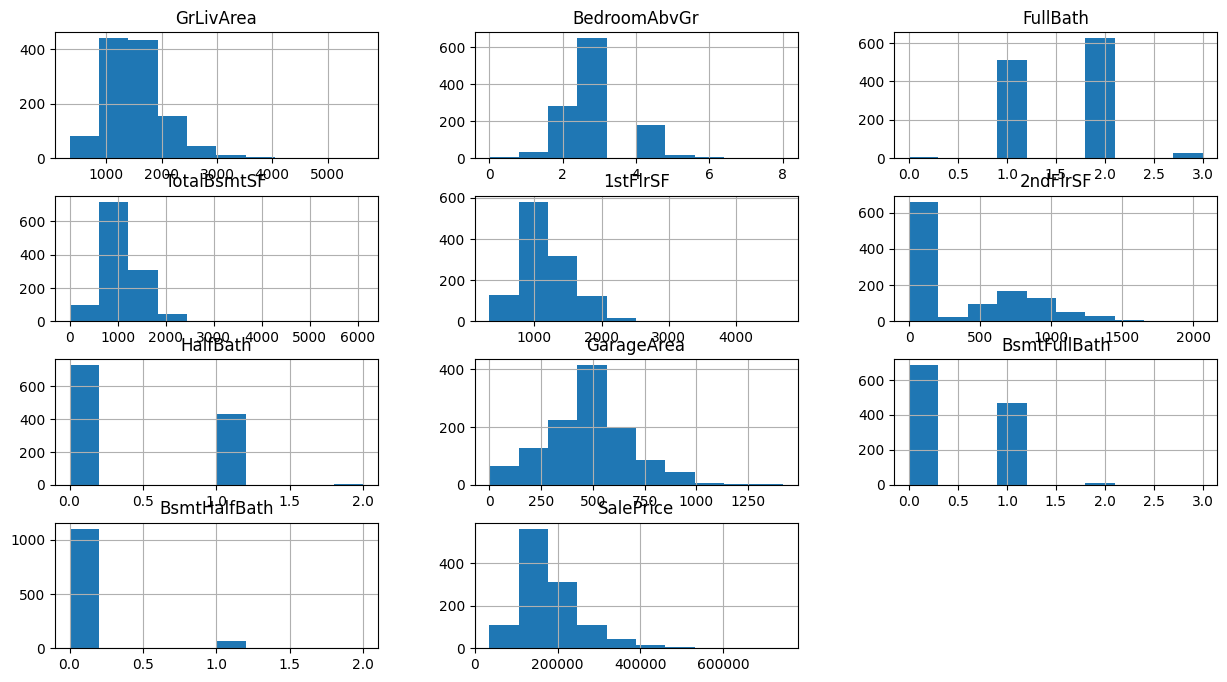

In [28]:

train_data.hist(figsize=(15,8))

In [33]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg.fit(X_train,y_train)
y_pred = Reg.predict(X_test)
from sklearn import metrics
metr = metrics.mean_squared_error(y_test, y_pred)

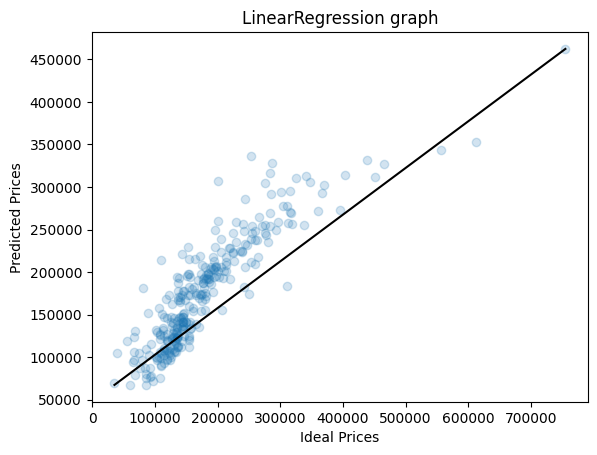

In [34]:
plt.scatter(y_test,y_pred,alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='black')
plt.xlabel("Ideal Prices")
plt.ylabel("Predicted Prices")
plt.title("LinearRegression graph")
plt.show()

In [35]:
data_tst = pd.read_csv("test.csv")
req_test = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
X_test = data_tst[req_test]
X_test = X_test.fillna(X_test.mean())
pred = Reg.predict(X_test)
ID = data_tst.loc[:,"Id"]
y_test = pd.DataFrame({"Id":ID,"SalePrice":pred})
print(y_test)

        Id      SalePrice
0     1461  140335.464990
1     1462  153708.789284
2     1463  194768.454831
3     1464  192249.865931
4     1465  188356.121005
...    ...            ...
1454  2915   83143.861470
1455  2916  105440.828698
1456  2917  150034.054549
1457  2918   79853.629462
1458  2919  232924.968359

[1459 rows x 2 columns]
